In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy
from KineticAssembly_AD import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver, TrapMetric
import networkx as nx
import torch
from torch import DoubleTensor as Tensor

In [2]:
base_input = '../input_files/tetramer_rategrowth.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

['default_assoc', 1.0]
['monomer_add_only', True]
['homo_rates', True]
[(0, {'struct': <networkx.classes.graph.Graph object at 0x000001CE130AD278>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1}), (1, {'struct': <networkx.classes.graph.Graph object at 0x000001CE0B4D62B0>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1}), (2, {'struct': <networkx.classes.graph.Graph object at 0x000001CE0B4D6438>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1}), (3, {'struct': <networkx.classes.graph.Graph object at 0x000001CE0B4D6898>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})]
New node added - Node index: 4 ; Node label: AM 
New node added - Node index: 5 ; Node label: AB 
New node added - Node index: 6 ; Node label: AS 
New node added - Node index: 7 ; Node label: BM 
New node added - Node index: 8 ; Node label: MS 
New node added - Node index: 9 ; Node label: ABM 
New node added - Node index: 10 ; Node label: AMS 
New node added - Node 

In [3]:
uid_dict = {}
react_dict = {}
sys.path.append("../../")
nodes_list = []
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    print(n,"--",gtostr(rn.network.nodes[n]['struct']))
    nodes_list.append(gtostr(rn.network.nodes[n]['struct']))
    for r_set in rn.get_reactant_sets(n):
        r_tup = tuple(list(r_set)+[n])
#         print(r_tup)
        data = rn.network.get_edge_data(r_tup[0], n)
        reaction_id = data['uid']
        react_dict[r_tup]=reaction_id
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = ("".join(r1),"".join(r2))
#         print(reactants)
        uid_dict[(n,k)] = uid
#         react_dict[reactants] = uid

print(uid_dict)
print(react_dict)

0 -- A
1 -- M
2 -- B
3 -- S
4 -- AM
5 -- AB
6 -- AS
7 -- BM
8 -- MS
9 -- ABM
10 -- AMS
11 -- BS
12 -- ABS
13 -- BMS
14 -- ABMS
{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 16, (0, 10): 17, (0, 12): 18, (0, 14): 21, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 19, (1, 14): 20, (2, 5): 1, (2, 7): 3, (2, 11): 7, (2, 9): 8, (2, 12): 9, (2, 13): 10, (2, 14): 11, (3, 6): 2, (3, 8): 4, (3, 11): 7, (3, 10): 12, (3, 12): 13, (3, 13): 14, (3, 14): 15, (4, 9): 8, (4, 10): 12, (5, 9): 5, (5, 12): 13, (6, 10): 6, (6, 12): 9, (7, 13): 14, (7, 9): 16, (8, 13): 10, (8, 10): 17, (9, 14): 15, (10, 14): 11, (11, 12): 18, (11, 13): 19, (12, 14): 20, (13, 14): 21}
{(0, 1, 4): 0, (0, 2, 5): 1, (0, 3, 6): 2, (1, 2, 7): 3, (1, 3, 8): 4, (1, 5, 9): 5, (2, 4, 9): 8, (0, 7, 9): 16, (3, 4, 10): 12, (1, 6, 10): 6, (8, 0, 10): 17, (2, 3, 11): 7, (3, 5, 12): 13, (0, 11, 12): 18, (2, 6, 12): 9, (8, 2, 13): 10, (3, 7, 13): 14, (1, 11, 13): 19, (9, 3, 14): 15, (1, 12, 14): 20, (0, 13, 14): 21, (10, 2, 

In [4]:
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()

new_kon = new_kon + Tensor([1.]*np.array(1e0))



# fast_rate = 10
# ratio = 10.270997986
# new_kon = new_kon + Tensor([fast_rate])
# new_kon[rn.rxn_class[(1,1)]] = fast_rate/ratio

update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 16}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 17}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 18}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 21}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on

In [5]:
vec_rn = VectorizedRxnNet(rn, dev='cpu')
vec_rn.reset()
# print(vec_rn.kon)
runtime =1e0
sim = VecSim(vec_rn, runtime, device='cpu',calc_flux=False)
y = sim.simulate(conc_scale=1,conc_thresh=1,mod_bool=True,verbose=True,yield_species=12)

Reaction rates:  tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.], dtype=torch.float64, grad_fn=<CopySlices>)
dGs:  tensor([-20., -20., -20., -20., -20., -40., -40., -20., -40., -40., -40., -60.,
        -40., -40., -40., -60., -40., -40., -40., -40., -60., -60.],
       dtype=torch.float64)
Species Concentrations:  tensor([100., 100., 100., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.], dtype=torch.float64)
Shifting to device:  cpu
Using CPU
Start of simulation: memory Used:  70.7
Final Conc Scale:  1
Number of steps:  256
Next time larger than simulation runtime. Ending simulation.
Memory Used:  70.8
RAM Usage (GB):  9.81167984008789
Final Yield:  tensor(0.1644, dtype=torch.float64, grad_fn=<DivBackward0>)


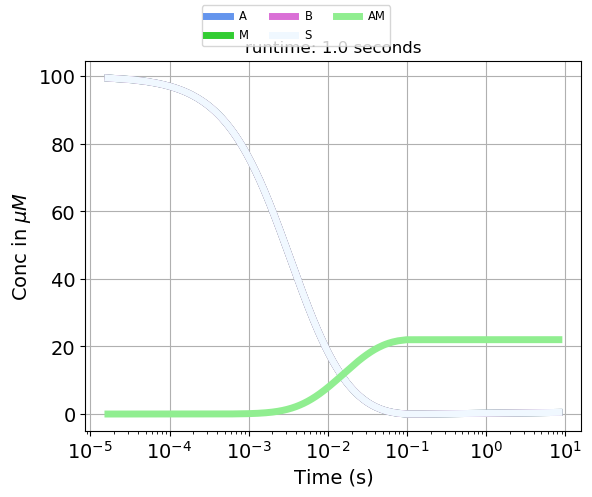

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
# nodes_list = ['A','B','M','S','AB','AM','AS','MS','BM','ABM','AMS','ABS','BMS','ABMS']
# nodes_list_repeat = ['A','B','S','AB','AS','AA','BS','ABS','AAB','AAS','AABS']
sim.plot_observable(nodes_list, ax=ax,legend=False,seed=201,lw=5)
ax.set_title("runtime: " + str(runtime) + " seconds")
handles,labels = ax.get_legend_handles_labels()
ax.set_xscale("log")
fig.legend(handles,nodes_list,loc='upper center',fancybox=True,ncol=3,fontsize='small',markerscale=1.0)
ax.grid(which="major",axis="both")

In [7]:
times=[]
print("Efficiency: ",(y[1][-2]*torch.max(new_kon)*100))
print("Scale Efficiency: ",0.95/(y[1][-2]*torch.max(new_kon)*100))
for t in y[1]:
    try:
        times.append(t.item())
    except:
        times.append(t)
print("Times: ",times)
print(list(new_kon.detach().numpy()))

Efficiency:  tensor(-100., dtype=torch.float64, grad_fn=<MulBackward0>)
Scale Efficiency:  tensor(-0.0095, dtype=torch.float64, grad_fn=<MulBackward0>)
Times:  [-1, -1, -1, -1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [8]:
conc_class ={i:0 for i in range(1,5)}
labels={1:'Monomers',2:'Dimers',3:'Trimers',4:'Tetramer'}
for n in rn.network.nodes():
    species=gtostr(rn.network.nodes[n]['struct'])
    len_s=len(species)
    
    conc_class[len_s]+= vec_rn.copies_vec[n].item()
    
for l,conc in conc_class.items():
    print(labels[l],"--","%.3f" %conc)

Monomers -- 1.900
Dimers -- 56.352
Trimers -- 65.773
Tetramer -- 22.020


In [9]:
# print(asdfaf)

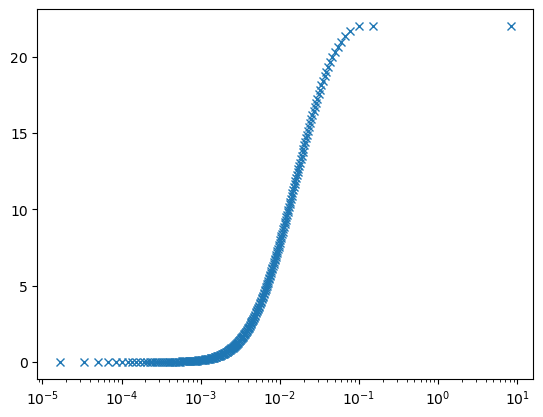

In [10]:
complx_conc = sim.observables[14][1]

fig,ax = plt.subplots()
ax.plot(sim.steps,complx_conc,linestyle='',marker='x')
ax.set_xscale("log")

In [11]:
def only_jumps(time,conc,mod_time):
    min_d = 2700
    max_d=3000
    filter_time=[]
    filter_conc=[]
    down_slope_array=[5.0]
    actual_slope_array=[]
    i=0
    jump_flag=False
    down_flag=False
    high_slope = 87.0
    down_slope = 5.0
    while True:
        del_c = conc[i+1]-conc[i]
        del_t = np.log(time[i+1]/time[i])
        
        slope = del_c/del_t
        angle = np.degrees(np.arctan(slope))
        
        #Checking for transitions
        if abs(angle - high_slope)<2.0:
            high_slope = angle
            jump_flag=True
            if conc[i]>85.0:
                print("Jump Slope:",angle,time[i])
            
        if jump_flag:
            filter_time.append(time[i])
            filter_conc.append(conc[i])
            jump_flag=False
            
            if conc[i]>85.0:
                print(angle,time[i])
            
        i+=1
        if i == len(time)-1:
            print("Last slope: ",angle,time[i],high_slope)
            break
    return(filter_time,filter_conc)

def convert_time_interval(time,conc,time_int=0.1):
    start_time=time[0]
    time_array = []
    conc_array = []
    for i in range(len(time)):
        new_time=time[i]
        ts = new_time/start_time
        if ts>=time_int:
            time_array.append(time[i])
            conc_array.append(conc[i])
            start_time=new_time
    return(time_array,conc_array)
        

In [12]:
# mod_time = sim.mod_start.item()
# print(mod_time)
# mod_time = 1
time_arr = np.array(sim.steps)
complx_conc = np.array(complx_conc)
# sel_time = (time_arr >= mod_time)
# sel_indx = np.argwhere(sel_time)[0][0]
# print(time_arr[sel_indx-1])
# filter_time,filter_conc=filter_data(time_arr[sel_indx-1:],complx_conc[sel_indx-1:],mod_time)

# filter_time,filter_conc=only_jumps(time_arr[sel_indx-3:],complx_conc[sel_indx-3:],mod_time)
# final_time = np.concatenate((time_arr[:sel_indx-3],filter_time[::25]))
# final_conc = np.concatenate((complx_conc[:sel_indx-3],filter_conc[::25]))

# final_time = final_time
# final_conc = final_conc

# print(filter_time[-1],filter_conc[-1])

# final_time = time_arr
# final_conc = complx_conc

sel_time = (time_arr >= 1e-3)
sel_indx = np.argwhere(sel_time)[0][0]

filter_time,filter_conc = convert_time_interval(time_arr[sel_indx-1:],complx_conc[sel_indx-1:],time_int=1.3)
final_time = np.concatenate((time_arr[:sel_indx],filter_time[:]))
final_conc = np.concatenate((complx_conc[:sel_indx],filter_conc[:]))

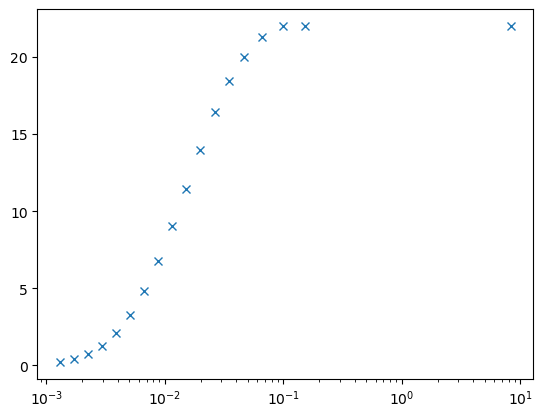

In [13]:
fig,ax = plt.subplots()
ax.plot(filter_time[:],filter_conc[:],linestyle='',marker='x')
ax.set_xscale("log")

(257,)


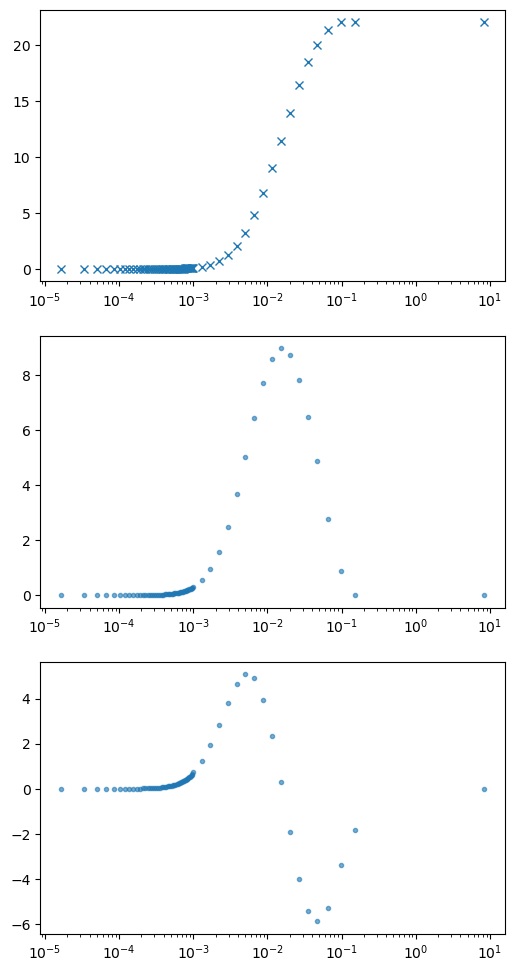

In [14]:
trap_met = TrapMetric(sim)

# lag,time_bounds = trap_met.calc_lag(np.array(sim.steps),np.array(sim.observables[14][1]),99.9)
time_arr = np.array(sim.steps)
print(time_arr.shape)
# mask = time_arr < 1e5
# print("Lag : ",lag)
# print(np.array(sim.steps))
# print(time_arr[mask])
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,12))
ax1.plot(final_time,final_conc,linestyle='',marker='x')
# ax1.vlines(time_bounds[0],ymin=0,ymax=100,color='k',linestyle='--')
# ax1.vlines(time_bounds[1],ymin=0,ymax=100,color='r',linestyle='--')
# ax1.vlines(time_bounds[2],ymin=0,ymax=100,color='g',linestyle='--')
ax1.set_xscale("log")

#Clean Version GRAD1
clean_time1 = time_arr

# l_grad2_unclean = trap_met.calc_slope(clean_time1,l_grad,mode='log')
# clean_time2,l_grad2 = trap_met.clean_data(clean_time1,l_grad2_unclean,mode='hist')
# l_grad3 = trap_met.calc_slope(clean_time2,l_grad2,mode='log')
# mask = (clean_time < 183) & (clean_time>181)

#Uncleaned version - GRAD1
l_grad_unclean = trap_met.calc_slope(final_time,final_conc,mode='log')

#Clean Version - GRAD2
# clean_time2,l_grad2 = trap_met.clean_data(clean_time1,l_grad,mode='hist')

#Unclean Version - GRAD2
l_grad2_unclean = trap_met.calc_slope(final_time,l_grad_unclean,mode='log')

ax2.plot(final_time[:],l_grad_unclean[:],linestyle='',marker='.',alpha=0.6)
# ax2.plot(np.array(sim.steps)[:],np.degrees(np.arctan(l_grad[:])),linestyle='',marker='.',alpha=0.6)
# ax2.vlines(time_bounds[0],ymin=0,ymax=100,color='k',linestyle='--')
# ax2.vlines(time_bounds[1],ymin=0,ymax=100,color='r',linestyle='--')
# ax2.vlines(time_bounds[2],ymin=0,ymax=100,color='g',linestyle='--')
ax2.set_xscale("log")

ax3.plot(final_time[:],l_grad2_unclean[:],linestyle='',marker='.',alpha=0.6)
# ax3.vlines(time_bounds[0],ymin=0,ymax=10,color='k',linestyle='--')
# ax3.vlines(time_bounds[1],ymin=0,ymax=10,color='r',linestyle='--')
# ax3.vlines(time_bounds[2],ymin=0,ymax=10,color='g',linestyle='--')
ax3.set_xscale("log")



[44  8  0  1  1  1  0  0  1  0  0  0  0  1  0  1  0  0  0  0  1  0  0  0
  0  0  0  2  0  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  0  0  1
  1  1]


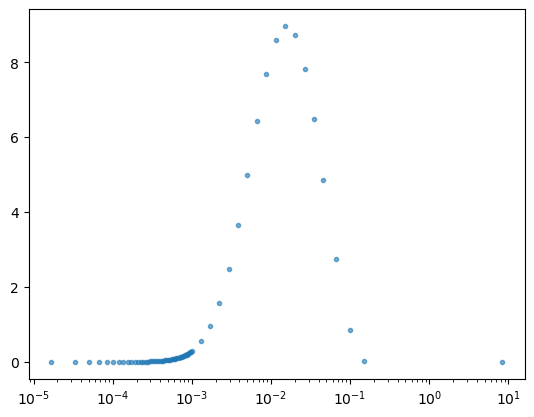

In [15]:
#Analysing GRAD1

l_grad_unclean = trap_met.calc_slope(final_time,final_conc,mode='log')
# step_size=[]
# for i in range(len(time_arr)-1):
#     delta = time_arr[i+1]-time_arr[i]
#     step_size.append(delta)
# remove_indx = []
# for i in range(len(step_size)-1):
#     delta = step_size[i+1]-step_size[i]
#     if delta < 0:
#         remove_indx.append(i)
# mask_bool = np.ones((len(time_arr)),dtype='bool')
# for i in range(len(remove_indx)):
#     mask_bool[remove_indx[i]:remove_indx[i]+1]=False
# clean_time1 = time_arr[mask_bool]
# l_grad = l_grad_unclean[mask_bool]

# clean_time1,l_grad=trap_met.clean_data(final_time,l_grad_unclean,mode='hist')

def clean_data(time,l_grad,thresh_freq=1,bin_num=50):
    data=np.histogram(l_grad,bins=bin_num)
    print(data[0])
    # print(data)
    flag=False
    count=0
    bin_val_min=0
    bin_val_max=0
    for i in range(len(data[0])):
        if data[0][i] >=10 and not flag:
            flag=True
            count+=1
            bin_val_min = data[1][i]
        elif data[0][i] <=1 and flag:
            count+=1
            bin_val_max=data[1][i]
            break

    mask_out = (l_grad <= bin_val_max) & (l_grad >= bin_val_min)
    new_time = np.array(time)[mask_out]
    l_grad_new = l_grad[mask_out]

    return(new_time,l_grad_new)

clean_time1,l_grad = clean_data(final_time,l_grad_unclean)
fig,ax2 = plt.subplots()

ax2.plot(final_time,l_grad_unclean,linestyle='',marker='.',alpha=0.6)
ax2.set_xscale("log")



In [16]:
actual_l_grad = l_grad_unclean
actual_time = final_time

#Finding time points by just visual picking
first_peak_mask = actual_time<1
first_peak_indx = np.argmax(actual_l_grad[first_peak_mask])
first_peak = actual_time[first_peak_mask][first_peak_indx]

second_regime_mask = (actual_time>1)
second_peak_indx = np.argmax(actual_l_grad[second_regime_mask])
second_peak = actual_time[second_regime_mask][second_peak_indx]

valley_mask = (actual_time>first_peak) & (actual_time<second_peak)
min_grad = np.argmin(actual_l_grad[valley_mask])
time_bounds = [first_peak,second_peak]

In [17]:
# print(eq_time)
print(time_bounds)
lag_time = np.log(time_bounds[1]/time_bounds[0])
print("Lag Factor: ",lag_time)

[0.01504290516715774, 8.328765603808863]
Lag Factor:  6.316564074784338


In [18]:
min_conc = np.argmin(final_conc[second_regime_mask])

mask_int = (actual_time>20) & (actual_time<1e4)

print("Trapped Yield: ",final_conc[second_regime_mask][min_conc]/10)
print("Avg trapped yield: ",np.mean(final_conc[mask_int])/10)

print("Trapped Yield: ",final_conc[valley_mask][min_grad]/1000)

Trapped Yield:  2.201966515235136
Avg trapped yield:  nan
Trapped Yield:  0.022007456263077273


C:\Users\denys\anaconda3\envs\jhu\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denys\anaconda3\envs\jhu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([ 1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       18., 17., 10.,  6.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  2.]), array([-5.89013119, -5.67067087, -5.45121056, -5.23175024, -5.01228993,
       -4.79282961, -4.57336929, -4.35390898, -4.13444866, -3.91498835,
       -3.69552803, -3.47606772, -3.2566074 , -3.03714709, -2.81768677,
       -2.59822646, -2.37876614, -2.15930583, -1.93984551, -1.72038519,
       -1.50092488, -1.28146456, -1.06200425, -0.84254393, -0.62308362,
       -0.4036233 , -0.18416299,  0.03529733,  0.25475764,  0.47421796,
        0.69367828,  0.91313859,  1.13259891,  1.35205922,  1.57151954,
        1.79097985,  2.01044017,  2.22990048,  2.4493608 ,  2.66882111,
        2.88828143,  3.10774174,  3.32720206,  3.54666238,  3.76612269,
        3.98558301,  4.20504332,  4.42450364,  4.64396395,  4.86342427,

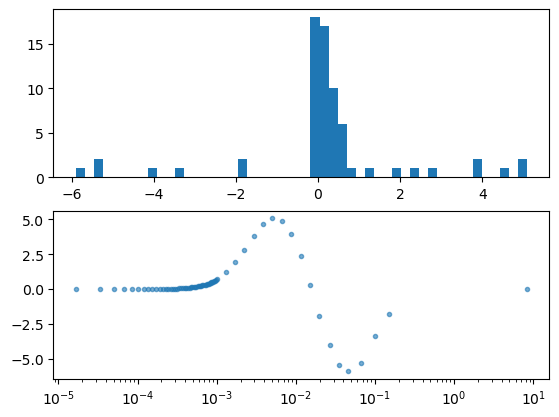

In [19]:
#Analyzing GRAD2
l_grad2_unclean = trap_met.calc_slope(final_time,l_grad_unclean,mode='log')


# data=np.histogram(l_grad2_unclean,bins=50)
# # print(data)
# flag=False
# count=0
# bin_val_min=0
# bin_val_max=0
# for i in range(len(data[0])):
#     if data[0][i] >=10 and not flag:
#         flag=True
#         count+=1
#         bin_val_min = data[1][i]
#     elif data[0][i] <=10 and flag:
#         count+=1
#         bin_val_max=data[1][i]
#         break
# print(bin_val_min,bin_val_max)
# mask_out = (l_grad2_unclean <= bin_val_max) & (l_grad2_unclean >= bin_val_min)
# clean_time2 = np.array(clean_time1)[mask_out]
# l_grad2_new = l_grad2_unclean[mask_out]

# clean_time2,l_grad2_new = trap_met.clean_data(clean_time1,l_grad2_unclean,mode='hist')
# clean_time2,l_grad2_new = trap_met.clean_data(clean_time2,l_grad2_new,mode='hist')
# clean_time2,l_grad2_new = trap_met.clean_data(clean_time2,l_grad2_new,mode='hist')

fig,[ax,ax2] = plt.subplots(2,1)
data_hist=ax.hist(l_grad2_unclean,bins=50)
print(data_hist)
ax2.plot(final_time,l_grad2_unclean,linestyle='',marker='.',alpha=0.6)
ax2.set_xscale("log")

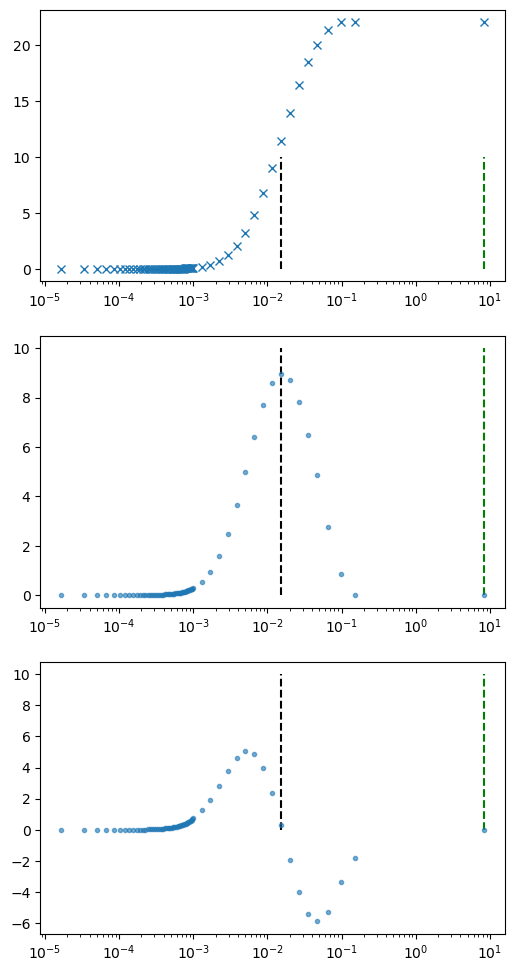

In [20]:
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,12))
ax1.plot(final_time[:],final_conc,linestyle='',marker='x')
ax1.vlines(time_bounds[0],ymin=0,ymax=10,color='k',linestyle='--')
ax1.vlines(time_bounds[1],ymin=0,ymax=10,color='g',linestyle='--')
# ax1.vlines(time_bounds[2],ymin=0,ymax=100,color='g',linestyle='--')
ax1.set_xscale("log")

ax2.plot(final_time[:],l_grad_unclean[:],linestyle='',marker='.',alpha=0.6)
ax2.vlines(time_bounds[0],ymin=0,ymax=10,color='k',linestyle='--')
ax2.vlines(time_bounds[1],ymin=0,ymax=10,color='g',linestyle='--')
# ax2.vlines(time_bounds[2],ymin=0,ymax=20,color='g',linestyle='--')
ax2.set_xscale("log")

ax3.plot(final_time[:],l_grad2_unclean[:],linestyle='',marker='.',alpha=0.6)
ax3.vlines(time_bounds[0],ymin=0,ymax=10,color='k',linestyle='--')
ax3.vlines(time_bounds[1],ymin=0,ymax=10,color='g',linestyle='--')
# ax3.vlines(time_bounds[2],ymin=0,ymax=10,color='g',linestyle='--')
ax3.set_xscale("log")

In [21]:
import networkx as nx
labels = nx.get_node_attributes(rn.network, 'struct')
labels = {key:gtostr(labels[key]) for key in labels.keys()}
# nx.draw_networkx(rn.network,labels=labels,node_size=1000)

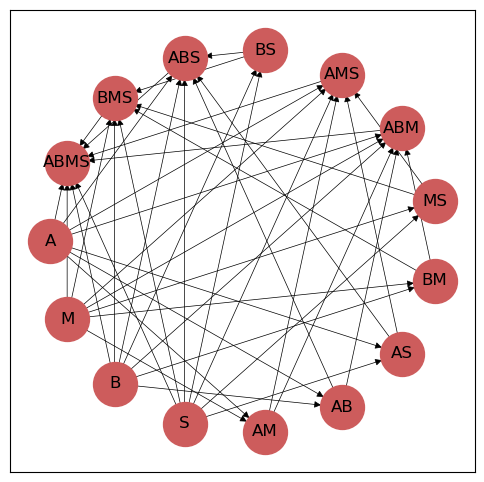

In [22]:
fig,ax = plt.subplots(figsize=(6,6))
sl_pos = nx.shell_layout(rn.network)
nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax,edgelist=[])
# new_kon = 0.5*np.array([0.8179, 0.8172, 0.8174, 0.8174, 0.8218, 0.0296, 0.0295, 4.6052, 0.8188,
#         0.8188, 7.7299, 5.4280, 0.8199, 0.8183, 7.1332, 4.9835, 4.9838, 0.0307,
#         0.0315, 5.2260, 5.2278])

if vec_rn.rxn_coupling:
    label_kon = 0.5*sim.coupled_kon.detach().numpy()
else:
    label_kon = 0.5*vec_rn.kon.detach().numpy()
    
sample_colors = ['black','black','black','black','olivedrab','orchid','darkorange','teal','']
edge_widths = []
edge_colors= []
for edge,uid in uid_dict.items():
    edge_widths.append(label_kon[uid])
    #edge_colors.append(sample_colors[uid])
nx.draw_networkx_edges(rn.network,pos=sl_pos,width=edge_widths,label=edge_widths,arrowsize=10,min_target_margin=15.0)


In [ ]:
vec_rn.update_reaction_net(rn)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

Off rates:  0.002061153622438557
Off rates:  0.002061153622438557
Off rates:  0.002061153622438557
Off rates:  0.002061153622438557
Off rates:  0.002061153622438557
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  0.002061153622438557
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  4.248354255291587e-12
Off rates:  8.756510762696517e-21
Off rates:  8.756510762696517e-21
Off rates:  8.756510762696517e-21
Off rates:  8.756510762696517e-21
